<a href="https://colab.research.google.com/github/akif2540/AygazBootcampProject/blob/main/AygazBootcampFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [158]:
insurance= pd.read_csv('insurance.csv')

In [159]:
df=insurance.copy() # gerçek veriyi bozmamak için veriyi kopyaladık
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [160]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [161]:
df.isna().sum() #üzerinde kullanılan bir işlemdir ve eksik (NaN) değerlerin her sütundaki toplam sayısını verir.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [163]:
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [164]:
#KATEGORİK DEĞİŞKENLERİ İNCELİYORUZ
def grab_col_names(df, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if df[col].dtype == "O"]
    num_cols = [col for col in df.columns if df[col].dtype != "O"]

    # Normalde sayısal ama benzersiz sayısı 'cat_th' değerinden az ise kategorik değişken olarak kabul eder.
    num_but_cat = [col for col in num_cols if df[col].nunique() < cat_th]

    # Normalde kategorik değişken ama benzersiz sayısı 'car_th' değerinden fazla ise kardinal olarak kabul eder.
    cat_but_car = [col for col in cat_cols if df[col].nunique() > car_th]

    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    cat_cols = cat_cols + num_but_cat

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car



In [165]:
cat_cols ,num_cols ,cat_but_car=grab_col_names(df)

Observations: 1338
Variables: 7
cat_cols: 4
num_cols: 4
cat_but_car: 0
num_but_cat: 1


In [166]:
def categorical_summary(df):
    cat_cols = [col for col in df.columns if df[col].dtype == "O"]

    for col in cat_cols:
        print(f"Summary for '{col}':")
        print(df[col].value_counts())
        print("\n")

In [167]:
categorical_summary(df)

Summary for 'sex':
male      676
female    662
Name: sex, dtype: int64


Summary for 'smoker':
no     1064
yes     274
Name: smoker, dtype: int64


Summary for 'region':
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64




In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_categorical(dataframe, col_names):
    for col_name in col_names:
        plt.figure(figsize=(8, 6))  # Grafik boyutunu
        sns.countplot(x=col_name, data=dataframe, alpha=0.7)
        plt.title(f'Distribution of {col_name}')
        plt.xticks(rotation=45)  # Eksen etiketlerini döndürmek için
        plt.show()

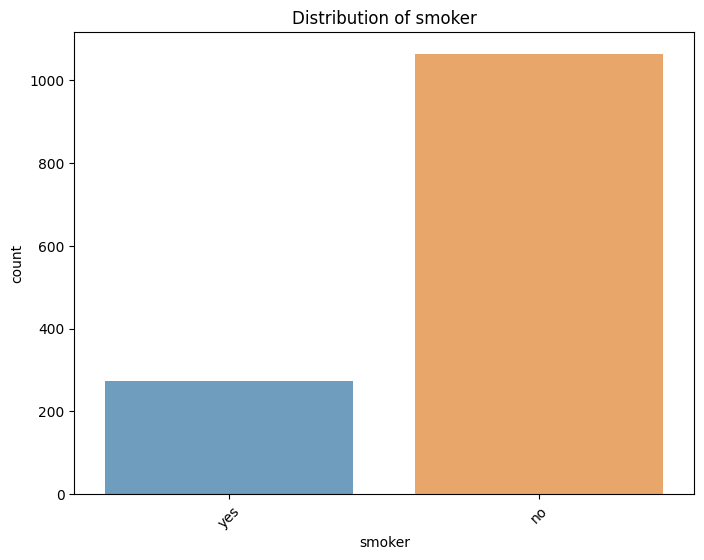

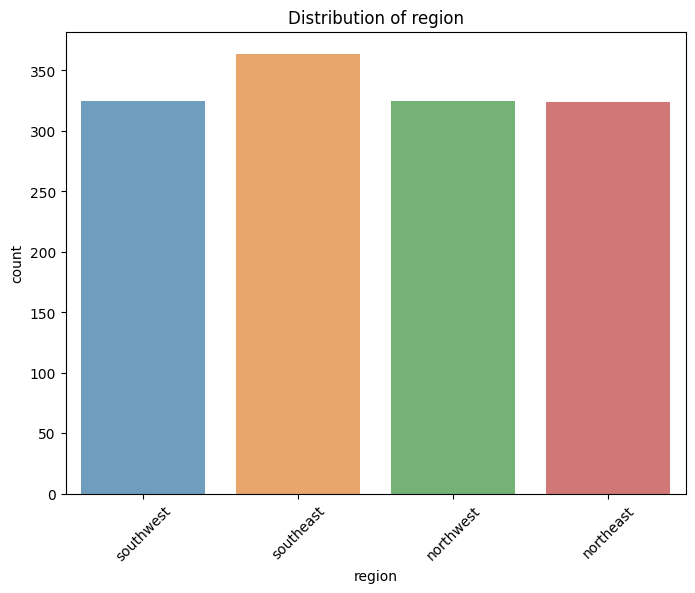

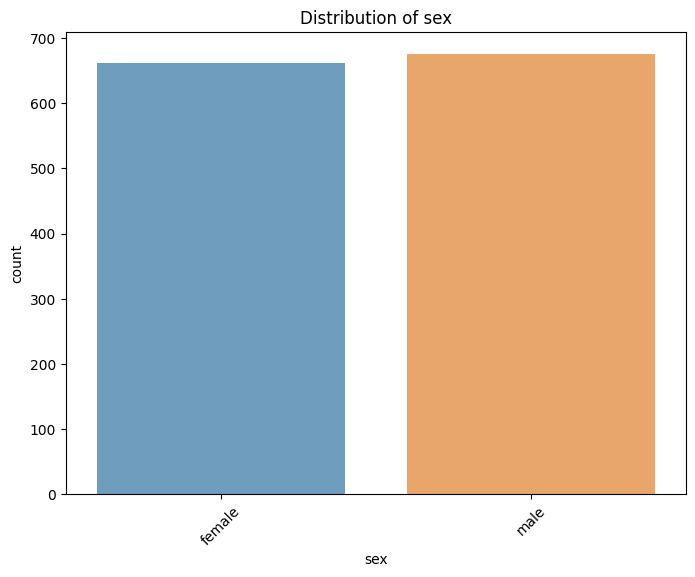

In [169]:
categorical_columns = ['smoker', 'region', 'sex']
visualize_categorical(df, categorical_columns)

In [170]:
# SAYISAL DEĞİŞKENLERİ İNCELİYORUZ
def visualize_numerical(dataframe, col_names):
    for col_name in col_names:
        plt.figure(figsize=(8, 6))  # Grafik boyutunu
        sns.histplot(data=dataframe, x=col_name, kde=True)
        plt.title(f'Distribution of {col_name}')
        plt.xticks(rotation=45)  # Eksen etiketlerini döndürmek için
        plt.show()
        print(f'Statistical Summary for {col_name}:\n')
        print(dataframe[col_name].describe())

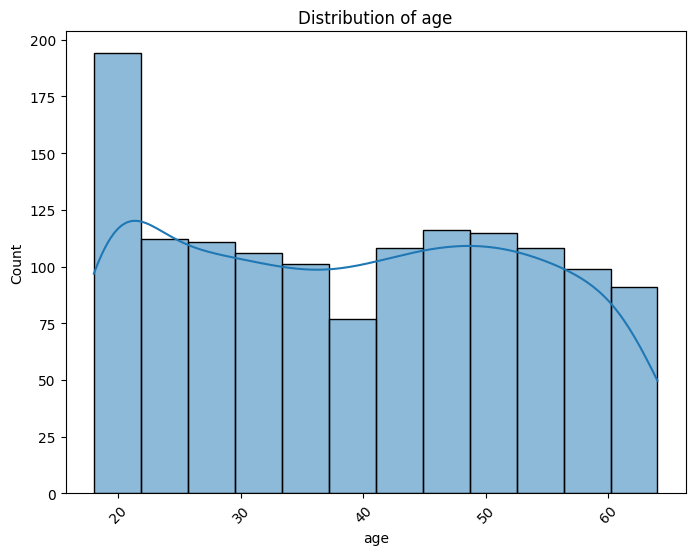

Statistical Summary for age:

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


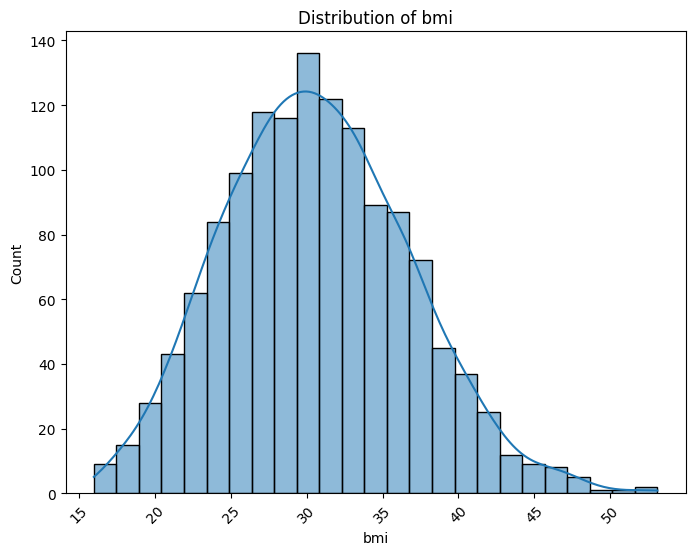

Statistical Summary for bmi:

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


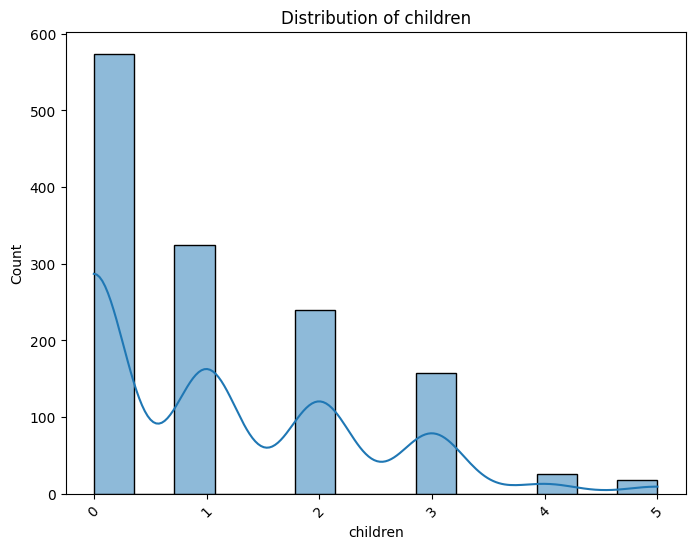

Statistical Summary for children:

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


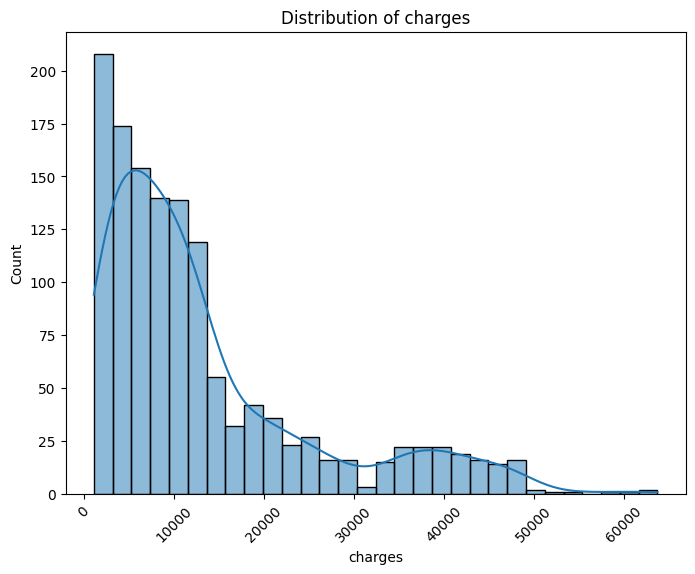

Statistical Summary for charges:

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


In [171]:
numerical_columns = ['age', 'bmi', 'children','charges']
visualize_numerical(df, numerical_columns)

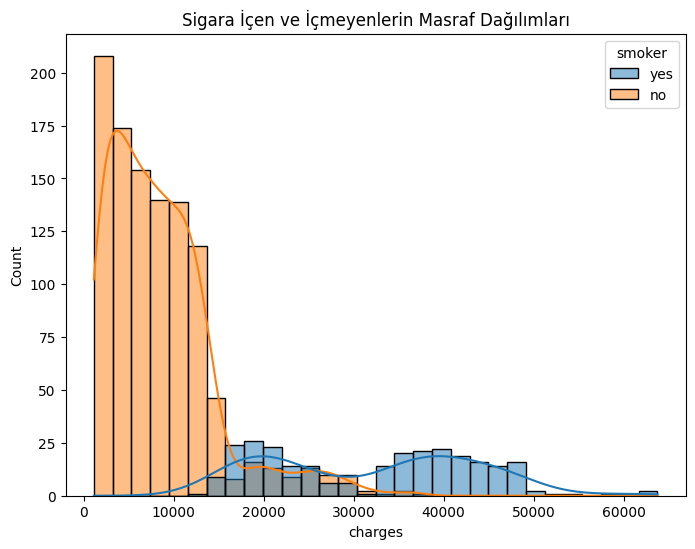

In [172]:
#SİGARA İÇEN VE MASRAFLAR ARASINDAKİ İLİŞKİ
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='charges', hue='smoker', kde=True)
plt.title('Sigara İçen ve İçmeyenlerin Masraf Dağılımları')
plt.show()


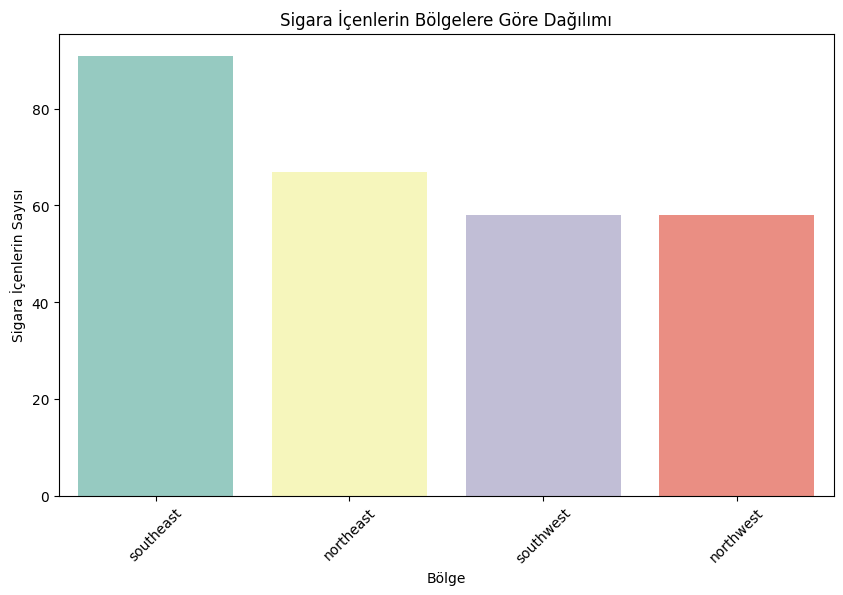

In [174]:
# SİGARA İÇENLERİN BÖLGELERE GÖRE DAĞILIMI
import seaborn as sns
import matplotlib.pyplot as plt

# Sigara içenleri filtreler
smokers_df = df[df['smoker'] == 'yes']

# Bölgelere göre dağılımı hesaplar
region_counts = smokers_df['region'].value_counts()

# Çubuk grafiği çizin
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='Set3')
plt.title('Sigara İçenlerin Bölgelere Göre Dağılımı')
plt.xlabel('Bölge')
plt.ylabel('Sigara İçenlerin Sayısı')
plt.xticks(rotation=45)
plt.show()



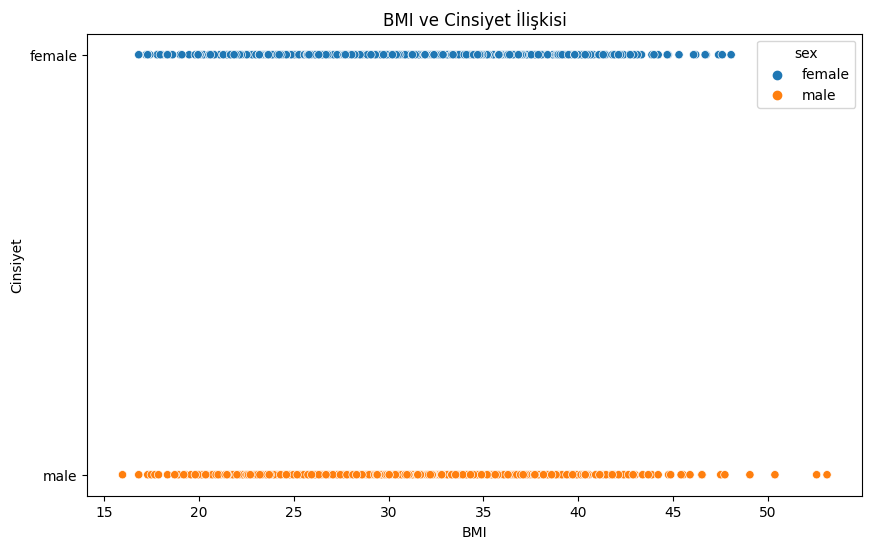

In [175]:
# "Bmı“ ve ”cinsiyet“ arasındaki ilişkiyi inceleyelim
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='sex', data=df, hue='sex')
plt.title('BMI ve Cinsiyet İlişkisi')
plt.xlabel('BMI')
plt.ylabel('Cinsiyet')
plt.show()


In [176]:
#EN ÇOK ÇOCUĞU OLAN BÖLGEYİ BULALIM
# Bölgelere göre gruplar ve her bölgedeki toplam çocuk sayısını hesaplar
region_children = df.groupby('region')['children'].sum().reset_index()

# Çocuk sayısına göre sıralar ve en çok çocuğa sahip bölgeyi bulur
most_children_region = region_children.sort_values(by='children', ascending=False).iloc[0]

# Sonucu yazdırır
print(f"En çok çocuğa sahip bölge: {most_children_region['region']}")
print(f"Toplam çocuk sayısı: {most_children_region['children']}")


En çok çocuğa sahip bölge: southeast
Toplam çocuk sayısı: 382


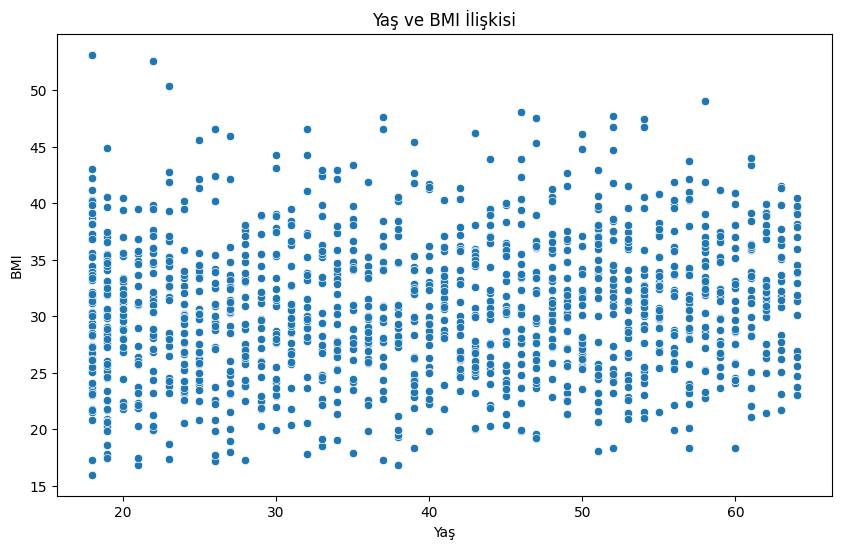

In [177]:
#YAŞ VE BMI ARASINDAKİ İLİŞKİYİ İNCELEYELİM
import seaborn as sns #Scatter Plot (Nokta Grafiği)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Yaş ve BMI İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('BMI')
plt.show()


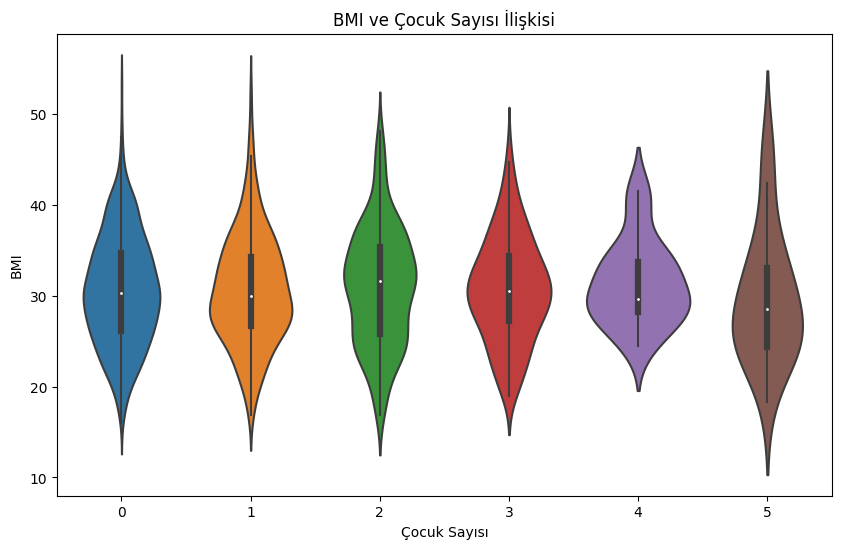

In [178]:
# BMI VE ÇOCUK SAYISI ARASINDAKİ İLİŞKİYİ İNCELEYİM
plt.figure(figsize=(10, 6)) #Violin Plot (Keman Grafiği)
sns.violinplot(x='children', y='bmi', data=df)
plt.title('BMI ve Çocuk Sayısı İlişkisi')
plt.xlabel('Çocuk Sayısı')
plt.ylabel('BMI')
plt.show()

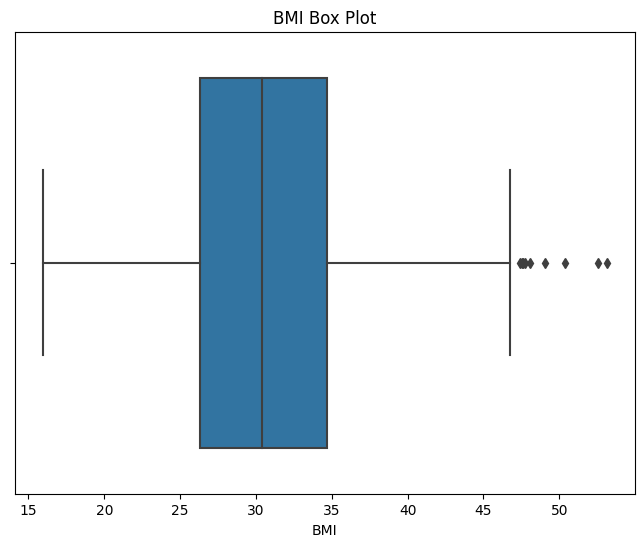

In [179]:
# BMI DEĞİŞKENİNDE AYKIRI BİR DEĞER VAR MI GÖZDEN GEÇİRELİM
import seaborn as sns #Görsel İnceleme (Box Plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi', data=df)
plt.title('BMI Box Plot')
plt.xlabel('BMI')
plt.show()

In [180]:
#Bu kod, "BMI" değişkeninde aykırı değer olup olmadığını kontrol eder.
# Eğer aykırı değer varsa, "BMI değişkeninde aykırı değer var mı?" sorusu "True" olarak cevaplanacaktır.
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range

    return low_limit, up_limit

def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    return any((dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit))

is_outlier = check_outlier(df, 'bmi')
print(f'BMI değişkeninde aykırı değer var mı?: {is_outlier}')


BMI değişkeninde aykırı değer var mı?: True


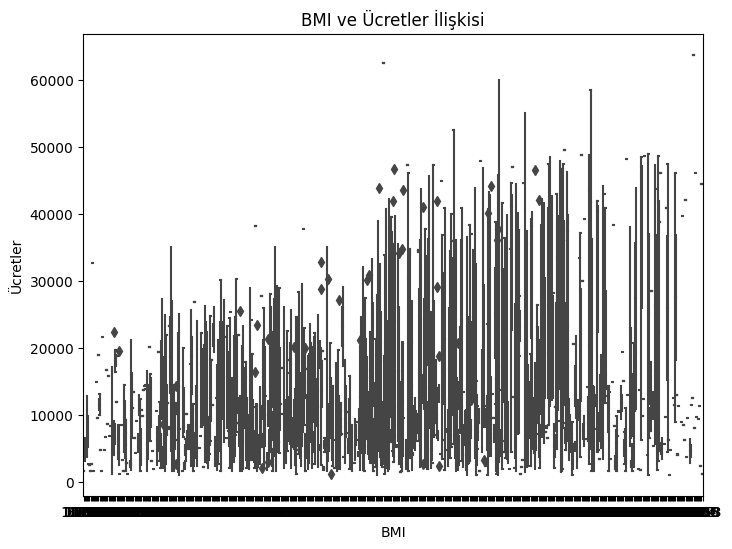

In [181]:
#BMI ve MASRAFLAR ARASINDAKİ İLİŞKİYİ İNCELEYELİM
plt.figure(figsize=(8, 6)) #Box Plot (Kutu Grafiği)
sns.boxplot(x='bmi', y='charges', data=df)
plt.title('BMI ve Ücretler İlişkisi')
plt.xlabel('BMI')
plt.ylabel('Ücretler')
plt.show()

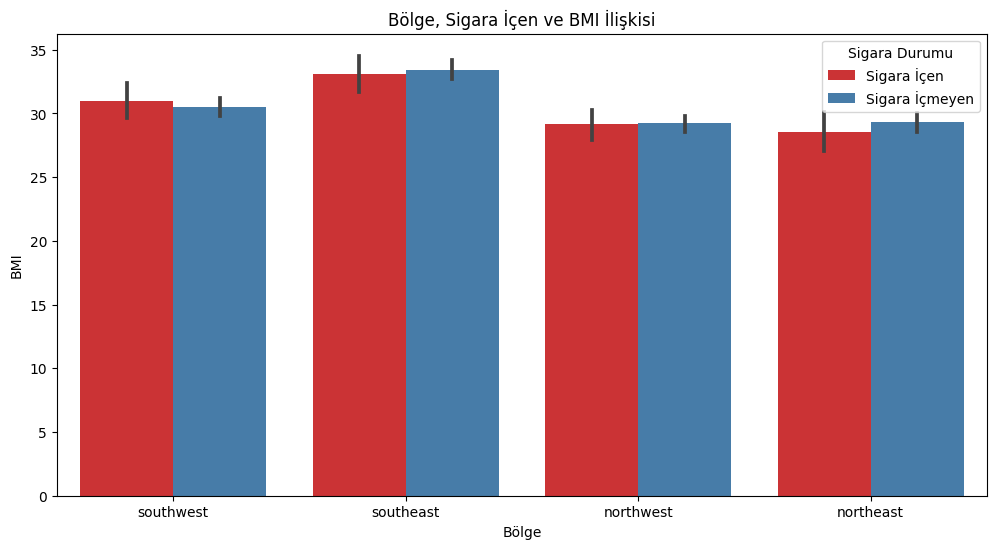

In [182]:
#ÇUBUK GRAFİĞİNİ KULLANARAK REGİON,SMOKER VE BMI ARASINDAKİ İLİŞKİYİ İNCELEYELİM
import seaborn as sns
import matplotlib.pyplot as plt

# "smoker" sütunundaki değerleri "Sigara İçen" ve "Sigara İçmeyen" olarak değiştirdik
df['smoker'] = df['smoker'].replace({'yes': 'Sigara İçen', 'no': 'Sigara İçmeyen'})

plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='bmi', hue='smoker', data=df, palette='Set1')
plt.title('Bölge, Sigara İçen ve BMI İlişkisi')
plt.xlabel('Bölge')
plt.ylabel('BMI')
plt.legend(title='Sigara Durumu', loc='upper right')
plt.show()


In [183]:
#KATEGORİK DEĞİŞKENLERİN KODLANMASI
#Label Encoding
#"Sex", "Smoker" ve "Region" gibi kategorik değişkenleri modelin anlayabileceği sayısal değerlere dönüştürür
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])
df['region_encoded'] = label_encoder.fit_transform(df['region'])


In [184]:
#One-Hot Encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


In [185]:
df

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded,sex_male,smoker_Sigara İçmeyen,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,0,3,0,0,0,0,1
1,18,33.770,1,1725.55230,1,1,2,1,1,0,1,0
2,28,33.000,3,4449.46200,1,1,2,1,1,0,1,0
3,33,22.705,0,21984.47061,1,1,1,1,1,1,0,0
4,32,28.880,0,3866.85520,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,1,1,1,1,0,0
1334,18,31.920,0,2205.98080,0,1,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,1,2,0,1,0,1,0
1336,21,25.800,0,2007.94500,0,1,3,0,1,0,0,1


In [186]:
#Bağımsız Değişkenler (X) ve Bağımlı Değişken (y) Ayırma
#Bağımsız değişkeni charges olarak belirledik
X = df.drop('charges', axis=1)  # Bağımsız değişkenler
y = df['charges']  # Bağımlı değişken


In [254]:
#Veriyi Eğitim ve Test Setlerine Bölme
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)


In [255]:
#Veri Ölçeklendirme (Normalization)
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


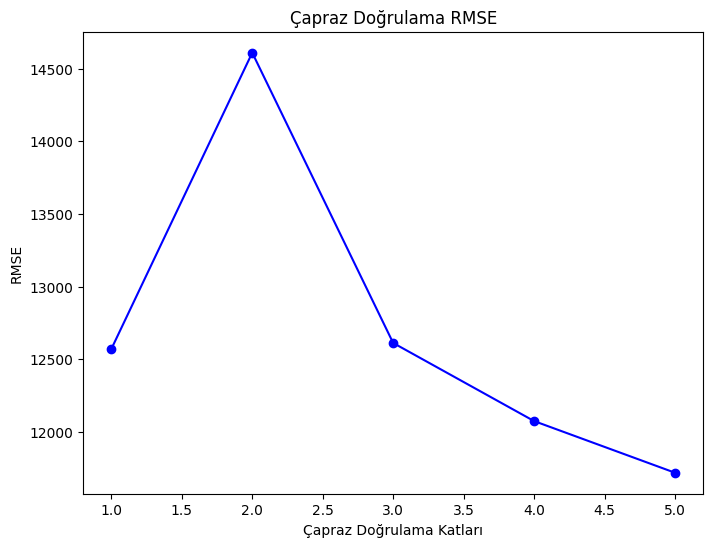

In [256]:
#Makine öğrenimi modeli seçme ve performanslarını değerlendirme
from sklearn.svm import SVR

model = SVR()
from sklearn.model_selection import cross_val_score

# Model seçimine göre çapraz doğrulama yapın ve performans ölçümlerini alır
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # Karekök alarak hata ölçüsünü hesaplar

# Performans sonuçlarını görselleştirir
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), rmse_scores, marker='o', linestyle='-', color='b')
plt.title('Çapraz Doğrulama RMSE')
plt.xlabel('Çapraz Doğrulama Katları')
plt.ylabel('RMSE')
plt.show()


In [236]:
#Çapraz doğrulama sonuçlarına dayanarak, en düşük RMSE (Karekök Ortalama Kare Hata) değerine sahip olan modeli seçebilirsiniz.
# Daha düşük RMSE değeri, modelin daha iyi tahminler yaptığını gösterir

In [257]:
#Grid Search Kullanarak Hiperparametre Ayarlama
#Grid Search Parametrelerini Ayarlama
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf', 'poly']}




In [258]:
#Grid Search'i Uygulama
from sklearn.svm import SVR

model = SVR()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [259]:
#En İyi Hiperparametreleri ve Modeli Bulma
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [260]:
#Ortalama Kare Hata (Mean Squared Error - MSE)
#MSE, tahminlerin gerçek değerlerden ne kadar uzak olduğunu ölçen bir metriktir.
from sklearn.metrics import mean_squared_error

y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 30581079.29427694


In [261]:
#Ortalama Mutlak Hata (Mean Absolute Error - MAE)
#MAE, tahminlerin gerçek değerlerden mutlak farklarının ortalamasını hesaplar
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 2387.654984357051


In [262]:
#Kök Ortalama Kare Hata (Root Mean Squared Error - RMSE)
#RMSE, MSE'nin kareköküdür ve tahminlerin gerçek değerlerden ne kadar uzak olduğunu ölçer.
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 5530.016211032021


In [263]:
#R-Kare (Coefficient of Determination - R^2)
#R-kare, bağımsız değişkenlerin bağımlı değişkenin varyansını ne kadar açıkladığını gösteren bir metriktir.
#1'e ne kadar yakınsa, modelin o kadar iyi olduğunu gösterir
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2}")


R-squared (R^2): 0.7780528885351378
